<a href="https://colab.research.google.com/github/NguyenCongDanh20146231/AI-Homework/blob/main/HW_AI_25_2_2023_NGUYENCONDANH_20146231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fd6daf79dd4171172f6479794241c893e92c404c421c7160c139e428c7a31b70
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


19.826604498361494


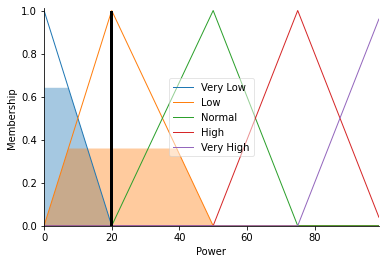

In [ ]:
# EX 2

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctal
# Fuzzy Set
Time = ctal.Antecedent(np.arange(10,180,1),'Time') 
Rice = ctal.Antecedent(np.arange(100,2000,1),'Rice') 
Power= ctal.Consequent(np.arange(0,100,1),"Power")

Time['Very Slow']=fuzz.trimf(Time.universe,[10,10,46])
Time['Slow']=fuzz.trimf(Time.universe,[10,46,85])
Time['Normal']=fuzz.trimf(Time.universe,[46,85,120])
Time['Fast']=fuzz.trimf(Time.universe,[85,120,180])
Time['Very Fast']=fuzz.trimf(Time.universe,[120,180,180])

Rice['Very Low']=fuzz.trimf(Rice.universe,[100,100,500])
Rice['Low']=fuzz.trimf(Rice.universe,[100,500,1200])
Rice['Normal']=fuzz.trimf(Rice.universe,[500,1200,1400])
Rice['Much']=fuzz.trimf(Rice.universe,[1200,1400,2000])
Rice['Very Much']=fuzz.trimf(Rice.universe,[1400,2000,2000])

Power['Very Low']=fuzz.trimf(Power.universe,[0,0,20])
Power['Low']=fuzz.trimf(Power.universe,[0,20,50])
Power['Normal']=fuzz.trimf(Power.universe,[20,50,75])
Power['High']=fuzz.trimf(Power.universe,[50,75,100])
Power['Very High']=fuzz.trimf(Power.universe,[75,100,100])

#Power.view()
#Rice.view()
#Time.view()

# Set Rule for Machine
rule_1=ctal.Rule(Time['Very Slow']&Rice['Very Low'],Power['Very Low'])
rule_2=ctal.Rule(Time['Very Slow']&Rice['Low'],Power['Very Low'])
rule_3=ctal.Rule(Time['Very Slow']&Rice['Normal'],Power['Low'])
rule_4=ctal.Rule(Time['Very Slow']&Rice['Much'],Power['Low'])
rule_5=ctal.Rule(Time['Very Slow']&Rice['Very Much'],Power['Normal'])

rule_6=ctal.Rule(Time['Slow']&Rice['Very Low'],Power['Very Low'])
rule_7=ctal.Rule(Time['Slow']&Rice['Low'],Power['Very Low'])
rule_8=ctal.Rule(Time['Slow']&Rice['Normal'],Power['Low'])
rule_9=ctal.Rule(Time['Slow']&Rice['Much'],Power['Normal'])
rule_10=ctal.Rule(Time['Slow']&Rice['Very Much'],Power['Normal'])

rule_11=ctal.Rule(Time['Normal']&Rice['Very Low'],Power['Low'])
rule_12=ctal.Rule(Time['Normal']&Rice['Low'],Power['Low'])
rule_13=ctal.Rule(Time['Normal']&Rice['Normal'],Power['Normal'])
rule_14=ctal.Rule(Time['Normal']&Rice['Much'],Power['High'])
rule_15=ctal.Rule(Time['Normal']&Rice['Very Much'],Power['High'])

rule_16=ctal.Rule(Time['Fast']&Rice['Very Low'],Power['Normal'])
rule_17=ctal.Rule(Time['Fast']&Rice['Low'],Power['Normal'])
rule_18=ctal.Rule(Time['Fast']&Rice['Normal'],Power['High'])
rule_19=ctal.Rule(Time['Fast']&Rice['Much'],Power['Very High'])
rule_20=ctal.Rule(Time['Fast']&Rice['Very Much'],Power['Very High'])

rule_21=ctal.Rule(Time['Very Fast']&Rice['Very Low'],Power['Normal'])
rule_22=ctal.Rule(Time['Very Fast']&Rice['Low'],Power['High'])
rule_23=ctal.Rule(Time['Very Fast']&Rice['Normal'],Power['High'])
rule_24=ctal.Rule(Time['Very Fast']&Rice['Much'],Power['Very High'])
rule_25=ctal.Rule(Time['Very Fast']&Rice['Very Much'],Power['Very High'])

# View Data
tipping_ctal=ctal.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,
                                 rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,
                                 rule_21,rule_22,rule_23,rule_24,rule_25])

tipping=ctal.ControlSystemSimulation(tipping_ctal)
tipping.input['Time']=60  # INPUT Time Value (Second)
tipping.input['Rice']=500  # INPUT Rice Value (gram)
tipping.compute()
print(tipping.output['Power']) # OUTPUT Power Vaule (%)
Power.view(sim=tipping)
